In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;


1. Data Exploration and Understanding:

• Dataset Overview:

1. Load the dataset and display the first 10 rows.

In [2]:
df = pd.read_csv(r"C:\Users\LOQ\datasets\WHR-2024-5CS037.csv");

print(df.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identify the number of rows and columns in the dataset.

In [3]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 143 rows and 9 columns.


3. List all the columns and their data types.

In [4]:
col_with_dtype = df.dtypes
print("Columns with their data type: \n")
print(col_with_dtype)

Columns with their data type: 

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [5]:
score_mean = df['score'].mean()
print(f" The mean of Score column is {score_mean}")

score_median = df['score'].median()
print(f" The median of Score column is {score_median}")

score_std = df['score'].std()
print(f" The standard deviation of Score column is {score_std}")

 The mean of Score column is 5.52758041958042
 The median of Score column is 5.785
 The standard deviation of Score column is 1.1707165099442993


2. Identify the country with the highest and lowest happiness scores.

In [6]:
highest_happiness_score_row = df[df['score']==df['score'].max()]
highest_happiness_score_country = highest_happiness_score_row['Country name'].values[0]
print(f"The country with Highest Happiness score is {highest_happiness_score_country}")

lowest_happiness_score_row = df[df['score']==df['score'].min()]
lowest_happiness_score_country = lowest_happiness_score_row['Country name'].values[0]
print(f"The country with Lowest Happiness score is {lowest_happiness_score_country}")

The country with Highest Happiness score is Finland
The country with Lowest Happiness score is Afghanistan


• Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [7]:
total_missing_value_count =df.isnull().sum()
print("total count of missing values for each column: \n")
print(total_missing_value_count)

total count of missing values for each column: 

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [8]:
greater_countries_score= df[df['score']>7.5]
print(greater_countries_score)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [9]:
sort_greater_countries_score = greater_countries_score.sort_values(by='Log GDP per capita', ascending=False)
print(sort_greater_countries_score.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [15]:
# Define a function for categorization
def categorize_happiness(score):
    if (score < 4):
        return 'Low'
    elif(4 <= score <= 6):
        return 'Medium'
    else:
        return 'High'

df['Happiness_Category'] = df['score'].apply(categorize_happiness)
print(df)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

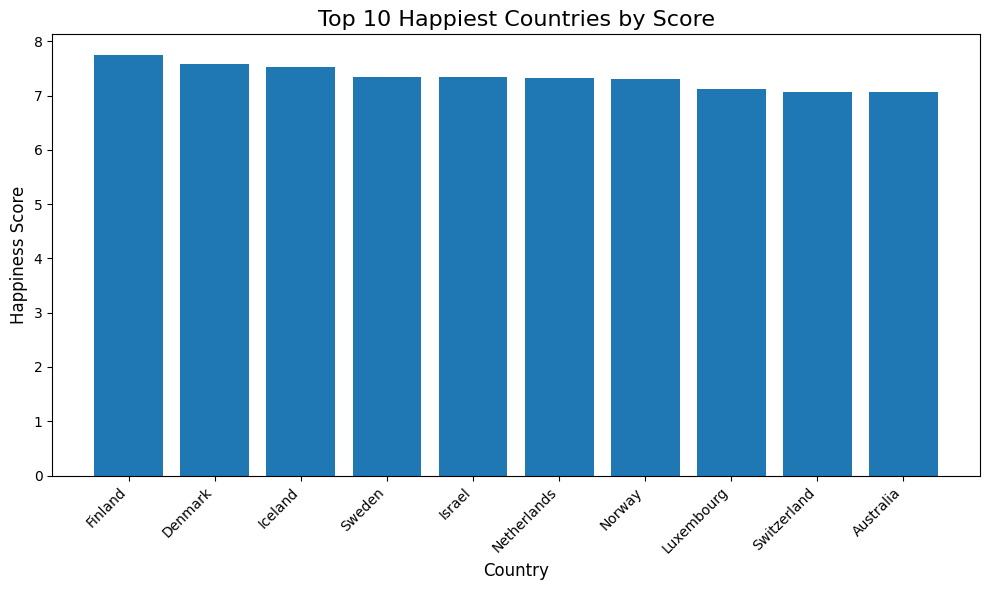

In [38]:
happiest_countries_by_score = df[df['Happiness_Category']=='High']
#filtering top 10 happiest countries
top_10_happiest_countries = happiest_countries_by_score.nlargest(10,'score')

plt.figure(figsize = (10,6))
plt.bar(top_10_happiest_countries['Country name'], top_10_happiest_countries['score'])
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
unhappiest_countries_by_score = df[df['Happiness_Category']=='Low']
top_10_unhappiest_countries = unhappiest_countries_by_score.nsmallest(10, 'score', ascending=False)

plt.figure(figsize = (10,6))
plt.plot(top_10_unhappiest_countries['Country name'],top_10_unhappiest_countries['score'],marker='o',linestyle='-', label='Unhappiness Score')
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Unhappiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


TypeError: DataFrame.nsmallest() got an unexpected keyword argument 'ascending'